In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
# Load Cleaned Data
df = pd.read_csv('supermart_cleaned.csv')

In [5]:
# Convert date column to datetime
df["date_time"] = pd.to_datetime(df["date_time"], errors='coerce')
df.dropna(subset=["date_time"], inplace=True)
df["day_of_week"] = df["date_time"].dt.day_name()
df["month"] = df["date_time"].dt.month_name()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               945 non-null    int64         
 1   invoice_id               945 non-null    object        
 2   branch                   945 non-null    object        
 3   city                     945 non-null    object        
 4   customer_type            945 non-null    object        
 5   gender                   945 non-null    object        
 6   product_line             945 non-null    object        
 7   unit_price               945 non-null    float64       
 8   quantity                 945 non-null    int64         
 9   tax_5%                   945 non-null    float64       
 10  total                    945 non-null    float64       
 11  payment                  945 non-null    object        
 12  cogs                     945 non-nul

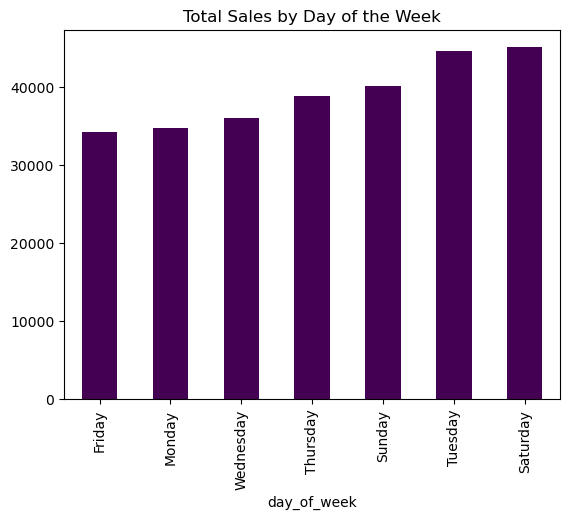

In [7]:
# 1. Sales Trends
## Best and Worst Performing Days
sales_by_day = df.groupby("day_of_week")["total"].sum().sort_values()
sales_by_day.plot(kind="bar", title="Total Sales by Day of the Week", colormap="viridis")
plt.show()

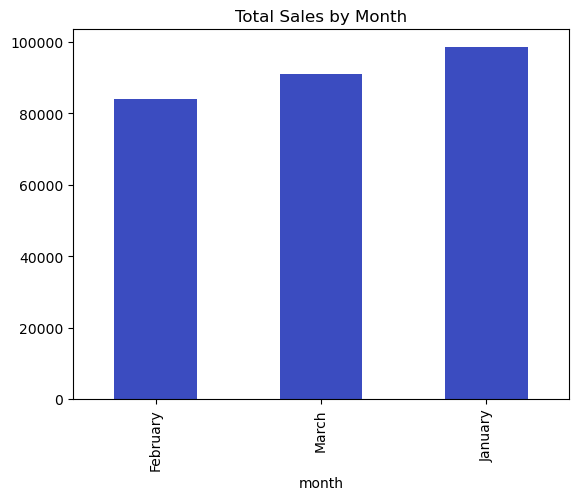

In [8]:
## Monthly and Seasonal Trends
sales_by_month = df.groupby("month")["total"].sum().sort_values()
sales_by_month.plot(kind="bar", title="Total Sales by Month", colormap="coolwarm")
plt.show()

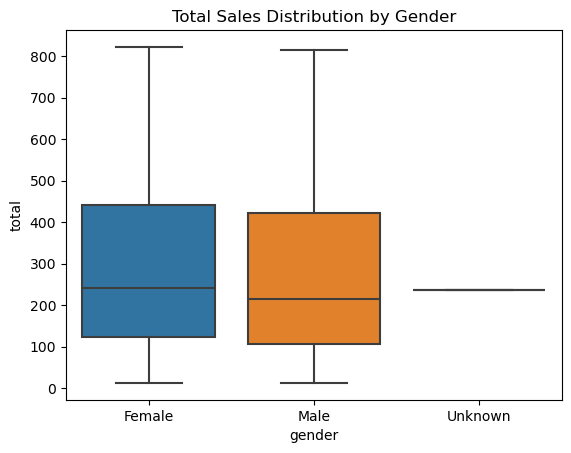

In [9]:
# 2. Customer Analysis
## Gender-based purchasing behavior
sns.boxplot(x="gender", y="total", data=df)
plt.title("Total Sales Distribution by Gender")
plt.show()

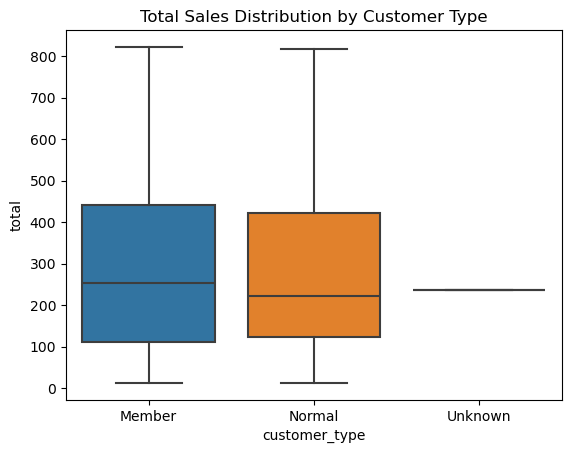

In [10]:
## Membership vs. Non-membership sales comparison
sns.boxplot(x="customer_type", y="total", data=df)
plt.title("Total Sales Distribution by Customer Type")
plt.show()

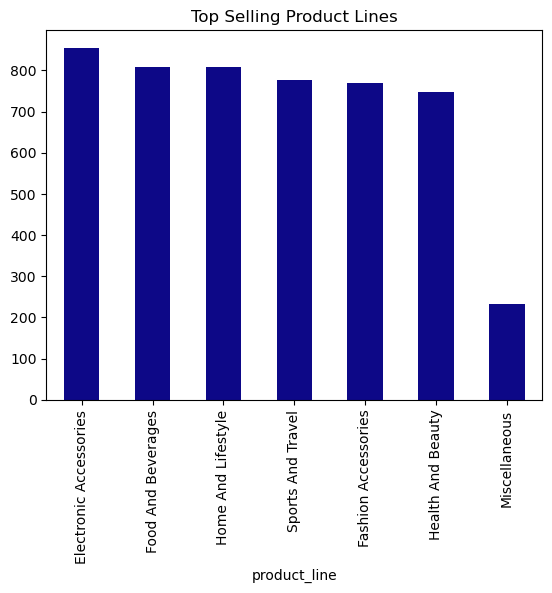

In [11]:
# 3. Product Line Analysis
## Top-selling product lines
top_products = df.groupby("product_line")["quantity"].sum().sort_values(ascending=False)
top_products.plot(kind="bar", title="Top Selling Product Lines", colormap="plasma")
plt.show()

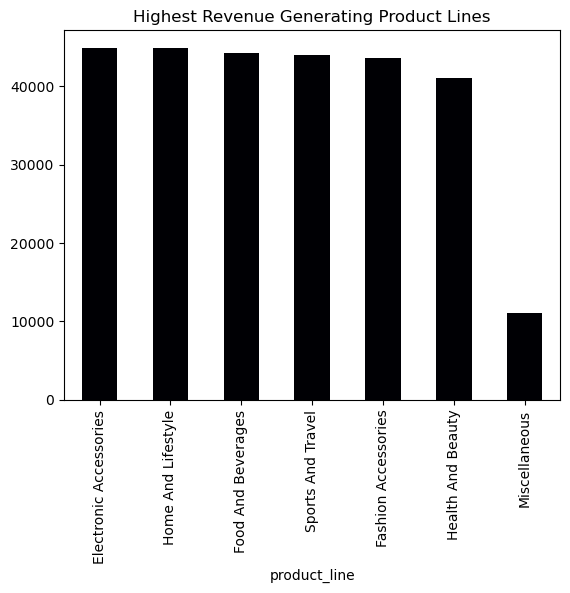

In [12]:
## Products generating highest revenue
high_revenue_products = df.groupby("product_line")["total"].sum().sort_values(ascending=False)
high_revenue_products.plot(kind="bar", title="Highest Revenue Generating Product Lines", colormap="magma")
plt.show()

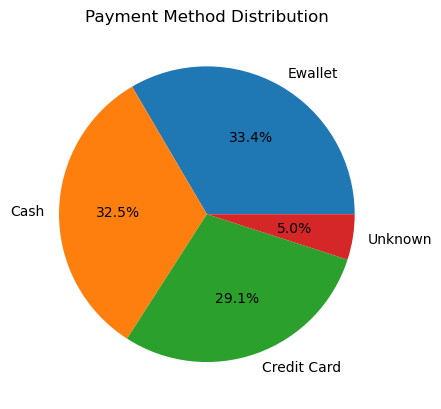

In [13]:
# 4. Payment Method Analysis
## Most preferred payment method
payment_method_counts = df["payment"].value_counts()
payment_method_counts.plot(kind="pie", autopct="%1.1f%%", title="Payment Method Distribution")
plt.ylabel("")
plt.show()

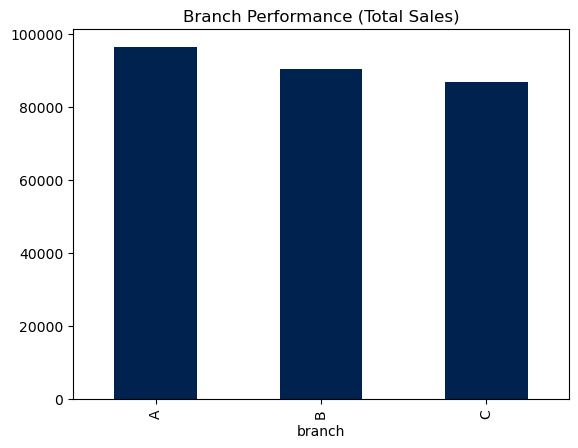

In [16]:
# 5. Branch Performance
## Comparison of branches across cities
branch_performance = df.groupby("branch")["total"].sum().sort_values(ascending=False)
branch_performance.plot(kind="bar", title="Branch Performance (Total Sales)", colormap="cividis")
plt.show()


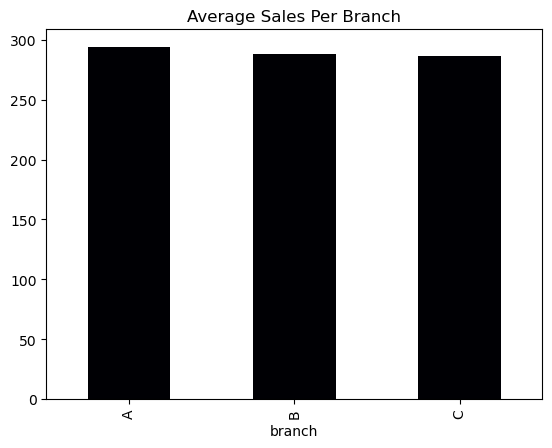

In [17]:
## Average sales per branch
avg_sales_branch = df.groupby("branch")["total"].mean()
avg_sales_branch.plot(kind="bar", title="Average Sales Per Branch", colormap="inferno")
plt.show()